In [1]:
from eit_reconstruction_models import EITReconstructionModel as t
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
from load_eit_data_from_csv import DataLoader
from visualise_reconstruction import *


2025-04-29 20:54:34.126988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745956474.140519  424392 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745956474.144632  424392 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745956474.155243  424392 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745956474.155260  424392 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745956474.155261  424392 computation_placer.cc:177] computation placer alr

In [ ]:
# 24 electrodes file configurations

# data_dir = "24 electrodes, 0.4 grid size"
# single_touch_data_file = "touch_simulation_results_24_4.csv"
# multi_touch_data_file = "multi_touch_simulation_24_4_4.csv"
# pickle_fname = "2d_24_elec_4_gdsize"
data_dir = "24 electrodes, grid size 0.3"
single_touch_data_file = "touch_simulation_results_24.csv"
multi_touch_data_file = "multi_touch_simulation_24_3.csv"
pickle_fname = "2d_24_elec_3_gdsize"

# data_dir = "24 electrodes, grid size 0.2"
# single_touch_data_file = "touch_simulation_results_24_2.csv"
# multi_touch_data_file = "multi_touch_simulation_24_2.csv"
# pickle_fname = "2d_24_elec_2_gdsize"
# data_dir = "24 electrodes, 0.1 grid size"
# single_touch_data_file = "touch_simulation_results_24_1.csv"
# multi_touch_data_file = "multi_touch_simulation_24_1.csv"
# pickle_fname = "2d_24_elec_1_gdsize"

# load data
dataloader = DataLoader(504)
dataloader.load_data(os.path.join(".", data_dir, single_touch_data_file), os.path.join(".", data_dir, multi_touch_data_file), three_d=False, force=True)

/cs/student/projects1/2021/nchavda/Final-year-project/load_eit_data_from_csv.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return float(row[2 + self.pairs_electrodes])


/cs/student/projects1/2021/nchavda/Final-year-project/load_eit_data_from_csv.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  area = float(row[self.num_classes * 2 + self.pairs_electrodes])


In [ ]:
# initialise the model
my_t = t(504, len(dataloader.index_to_coordinate))
model = my_t.create_dnn_model_regression()

In [ ]:
# split the data into train: val: test sets, standardise the data and add noise
def add_gaussian_noise(X, mean=0.0, std=0.01):
    noise = np.random.normal(loc=mean, scale=std, size=X.shape)
    return X + noise


X_train, X_test, y_train, y_test = train_test_split(dataloader.voltage_array, dataloader.output_array, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train = add_gaussian_noise(X_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test, X_val = scaler.transform(X_test), scaler.transform(X_val)


/cs/student/projects1/2021/nchavda/Final-year-project/.venv/lib64/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745956492.423761  424392 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10422 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [ ]:
# train model
history = my_t.model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=128, 
                    callbacks=[])

Epoch 1/1000
122/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - mae: 0.0635 - root_mean_squared_error: 0.0819

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - mae: 0.0636 - root_mean_squared_error: 0.0819 - val_loss: 0.0067 - val_mae: 0.0635 - val_root_mean_squared_error: 0.0811
Epoch 2/1000
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - mae: 0.0640 - root_mean_squared_error: 0.0820 - val_loss: 0.0067 - val_mae: 0.0629 - val_root_mean_squared_error: 0.0811
Epoch 3/1000
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mae: 0.0636 - root_mean_squared_error: 0.0817 - val_loss: 0.0067 - val_mae: 0.0624 - val_root_mean_squared_error: 0.0811
Epoch 4/1000
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mae: 0.0637 - root_mean_squared_error: 0.0817 - val_loss: 0.0067 - val_mae: 0.0628 - val_root_mean_squared_error: 0.0808
Epoch 5/1000
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mae: 0.0631 - root_mean_squared_error: 0.0812 - val_loss: 0.0067 - val_mae: 0.0629 - val_root_mean_squared_error: 0.0808
Epoch 6/1000
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

KeyboardInterrupt: 

In [ ]:
# evaluate the model on test set
results = my_t.model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - mae: 0.0632 - root_mean_squared_error: 0.0819
Test Loss: 0.00677978852763772, Test Accuracy: 0.06308463215827942


189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - mae: 0.0607 - root_mean_squared_error: 0.0808
Test Loss: 0.006590912584215403, Test Accuracy: 0.06056247279047966


 63/189 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
[0.18789689 0.22227228 0.222629   0.18485574 0.24801165 0.21169373
 0.21864133 0.20340158 0.22708717 0.18052962 0.22333625 0.18300828
 0.20588633 0.2086312  0.21747074 0.17402057 0.2263322  0.21222432
 0.21466802 0.21050812 0.18883699 0.21795797 0.20011123 0.18588777
 0.27473584 0.24526447 0.1926491  0.19735669 0.19570985 0.21925797
 0.23205428 0.18805398 0.18638058 0.21292797 0.24993284 0.26967606
 0.21092889 0.2737358  0.2719814  0.22214752 0.19338365 0.26479793
 0.25440586 0.24797045 0.25075623 0.20152615 0.24361908 0.23197219
 0.24815163 0.23519252 0.26740092 0.23954305 0.2567651  0.20847486
 0.3224762  0.07309502 0.04851781 0.3885613  0.05578557 0.09473512
 0.27810138 0.25642952 0.2692445  0.24969245]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.3 0.  0.3 0.3 0.3 0.3 0.3 0.3 0.  0.  0.3 0.3 0.  0.3 0.3 0.3 0.  0.3
 0.3 0.3 0.  0.3 0.3 0.3 0.  0.3 0.  

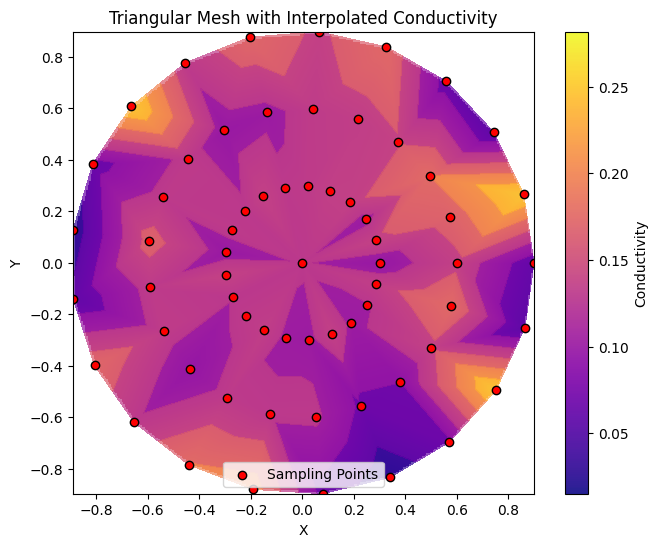

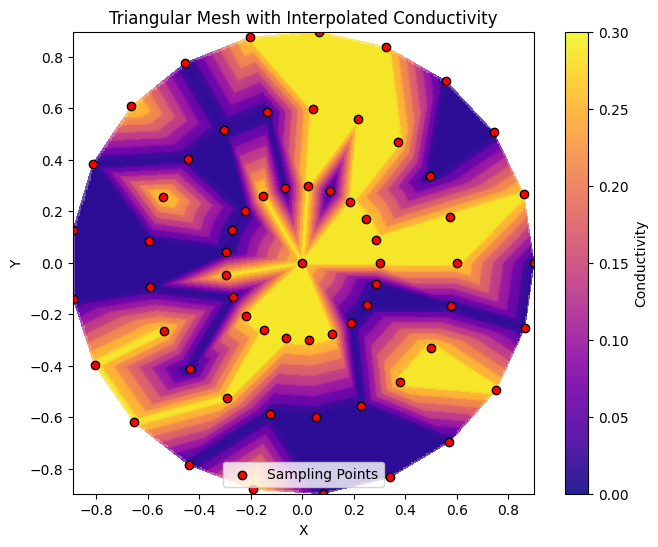

In [ ]:
# make predictions and visualise the image reconstruction
y_pred = model.predict(X_test)
y_pred_bin = (y_pred >= 0.5).astype(int)
print(y_pred[1])
print(y_pred_bin[1])
print(y_test[1])

create_triangular_mesh(y_pred[90], 300, 300, dataloader.index_to_coordinate)
create_triangular_mesh(y_test[90], 300, 300, dataloader.index_to_coordinate)

In [ ]:
# classification report, comment out for regression
my_t.print_report(y_test, y_pred_bin)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3151
           1       0.87      0.88      0.88      3150
           2       0.87      0.88      0.87      3170
           3       0.87      0.89      0.88      3167
           4       0.87      0.89      0.88      3159
           5       0.88      0.88      0.88      3165
           6       0.88      0.88      0.88      3182
           7       0.87      0.89      0.88      3151
           8       0.87      0.90      0.88      3160
           9       0.88      0.89      0.88      3182
          10       0.86      0.90      0.88      3140
          11       0.88      0.89      0.89      3150
          12       0.87      0.88      0.88      3154
          13       0.87      0.88      0.88      3144
          14       0.88      0.88      0.88      3165
          15       0.87      0.88      0.88      3152
          16       0.88      0.89      0.88      3173
          17       0.87    

/cs/student/projects1/2021/nchavda/Final-year-project/.venv/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.87      0.89      0.88      3151\n           1       0.87      0.88      0.88      3150\n           2       0.87      0.88      0.87      3170\n           3       0.87      0.89      0.88      3167\n           4       0.87      0.89      0.88      3159\n           5       0.88      0.88      0.88      3165\n           6       0.88      0.88      0.88      3182\n           7       0.87      0.89      0.88      3151\n           8       0.87      0.90      0.88      3160\n           9       0.88      0.89      0.88      3182\n          10       0.86      0.90      0.88      3140\n          11       0.88      0.89      0.89      3150\n          12       0.87      0.88      0.88      3154\n          13       0.87      0.88      0.88      3144\n          14       0.88      0.88      0.88      3165\n          15       0.87      0.88      0.88      3152\n          16       0.88      0.89      0.88      3173\n       

In [ ]:
# my_t.save_model('training_2d_24_2_grid_size_testacc_75.h5')